In [99]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
from util import MirAudioSegment
from scipy.fft import fft
from scipy.signal import stft
import librosa

In [36]:
track = MirAudioSegment.from_file("../DoReMir/articulation/A_violin/a1.wav")

In [37]:
# Signal only in one channel
signal = np.array(track.samples())

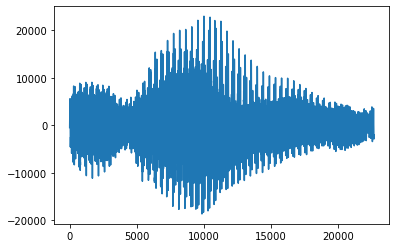

In [38]:
# Waveform
plt.plot(np.arange(len(signal)), signal)

In [39]:
from scipy.signal.windows import gaussian, hamming, hann

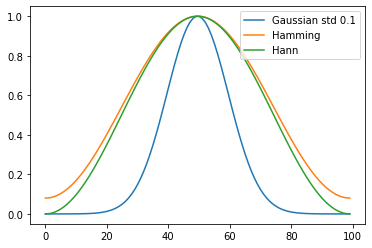

In [40]:
# Constructing window functions
window_pts = 100
plt.plot(np.arange(window_pts), gaussian(window_pts, window_pts*0.1))
plt.plot(np.arange(window_pts), hamming(window_pts))
plt.plot(np.arange(window_pts), hann(window_pts))
plt.legend(["Gaussian std 0.1", "Hamming", "Hann"])

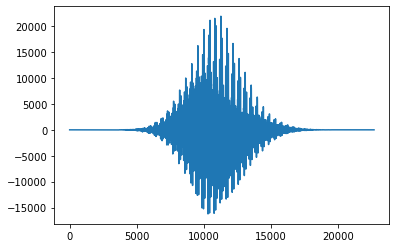

In [41]:
# Combining signal and window
signal_pts = len(signal)
window = gaussian(signal_pts, signal_pts*0.1)
frame = signal*window
plt.plot(np.arange(signal_pts), frame)


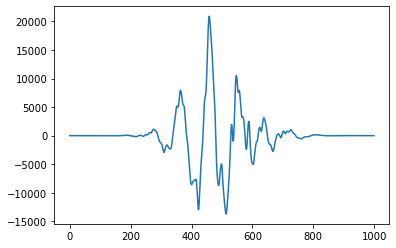

In [42]:
#Smaller time-scale
signal_pts = 1000
window = gaussian(signal_pts, signal_pts*0.1)
frame=signal[10000:10000+signal_pts]*window
plt.plot(np.arange(signal_pts), frame)

In [20]:
# Compute the fast fourier transform
freq_representation = fft(signal)
freq_magnitude = np.abs(freq_representation)

In [43]:
# Physical frequency 
# F_{coef}(k) = k/(N*T)
frequencies = np.arange(len(signal))*(track.frame_rate/len(signal))

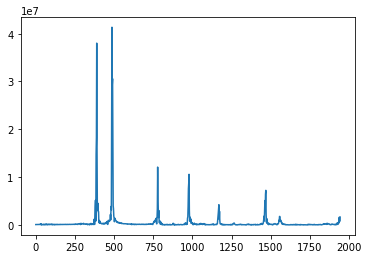

In [44]:
plt.plot(frequencies[:1000], freq_magnitude[:1000])

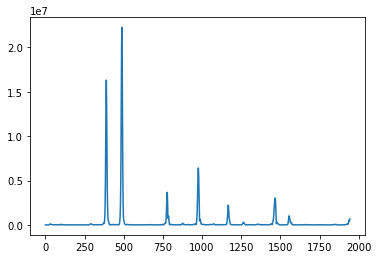

In [45]:
# Fourier transform on the windowed signal
signal_pts = len(signal)
window = gaussian(signal_pts, signal_pts*0.1)
frame = signal*window
freq = fft(frame)
frequencies = np.arange(len(signal))*(track.frame_rate/len(signal))
plt.plot(frequencies[:1000], np.abs(freq)[:1000])

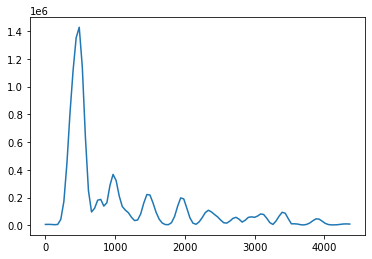

In [46]:
#Smaller time-scale - 
signal_pts = 1000
window = gaussian(signal_pts, signal_pts*0.1)
frame=signal[10000:10000+signal_pts]*window
freq = fft(frame)
frequencies = np.arange(1000)*(track.frame_rate/1000)
plt.plot(frequencies[:100], np.abs(freq)[:100])


<AxesSubplot:title={'center':'STFT magnitude spectrum'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>

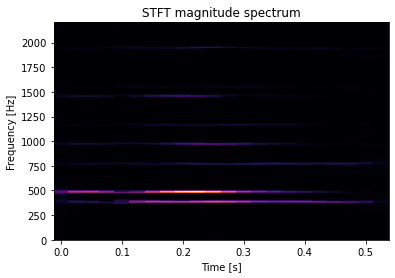

In [74]:
# Short time fourier transform
track.compute_stft(w_length=0.1, hop_factor=0.25)
track.plot_magnitude(squared=False)

<AxesSubplot:title={'center':'STFT magnitude spectrum'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>

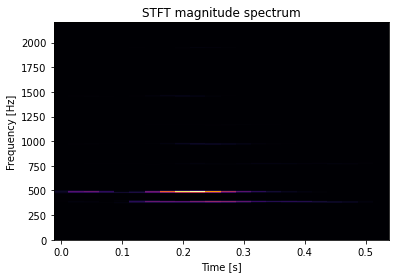

In [78]:
# Squared values (spectrogram)
track.compute_stft(w_length=0.1, hop_factor=0.25)
track.plot_magnitude(squared=True)

<AxesSubplot:title={'center':'STFT magnitude spectrum'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>

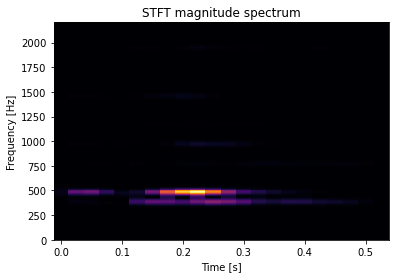

In [72]:
# Using gaussian window
track.compute_stft(w_length=0.1, hop_factor=0.25, window=("gaussian", 0.01*len(signal)))
track.plot_magnitude()

<AxesSubplot:title={'center':'STFT magnitude spectrum'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>

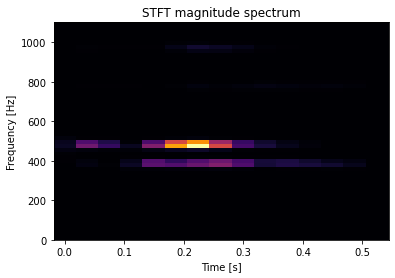

In [73]:
# Changing window size
track.compute_stft(w_length=0.05, hop_factor=0.75)
track.plot_magnitude()

2206 22


<AxesSubplot:xlabel='Time (s)', ylabel='MIDI pitch'>

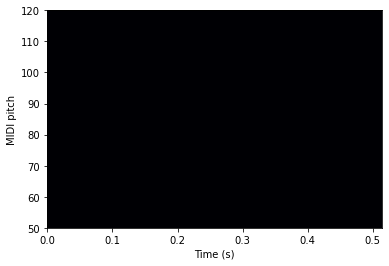

In [96]:
# Using librosa
stft = 